In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report,accuracy_score
import warnings 
warnings.filterwarnings("ignore")

In [205]:
data = pd.read_csv('US_Heart_Patients.csv', index_col=0)

### First 10 rows

In [206]:
data.head(10)

,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
Gender,,,,,,,,,,,,,,,
Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
Female,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0


In [207]:
data.shape

(4240, 15)

### 5-point summary

In [208]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.579283,8.572875,32.00,42.00,49.000,56.00,70.0
education,4130.0,1.979903,1.019943,1.00,1.00,2.000,3.00,4.0
currentSmoker,4237.0,0.494218,0.500026,0.00,0.00,0.000,1.00,1.0
cigsPerDay,4209.0,9.001901,11.920742,0.00,0.00,0.000,20.00,70.0
BP Meds,4180.0,0.029665,0.169682,0.00,0.00,0.000,0.00,1.0
prevalentStroke,4231.0,0.005909,0.076650,0.00,0.00,0.000,0.00,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.000,1.00,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.000,0.00,1.0
tot cholesterol,4180.0,236.677273,44.616098,107.00,206.00,234.000,263.00,696.0
Systolic BP,4236.0,132.362370,22.039244,83.50,117.00,128.000,144.00,295.0


### Information about the columns (data types)

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4240 entries, Male to Female
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4238 non-null   float64
 1   education        4130 non-null   float64
 2   currentSmoker    4237 non-null   float64
 3   cigsPerDay       4209 non-null   float64
 4   BP Meds          4180 non-null   float64
 5   prevalentStroke  4231 non-null   float64
 6   prevalentHyp     4238 non-null   float64
 7   diabetes         4238 non-null   float64
 8   tot cholesterol  4180 non-null   float64
 9   Systolic BP      4236 non-null   float64
 10  Diastolic BP     4235 non-null   float64
 11  BMI              4216 non-null   float64
 12  heartRate        4236 non-null   float64
 13  glucose          3849 non-null   float64
 14  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 530.0+ KB


### Missing values in the dataset

In [210]:
data.isnull().sum()

age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

### Compute the correlation between variables

In [211]:
correlation_matrix = data.corr()
print("\nCorrelation matrix:")
correlation_matrix


Correlation matrix:


,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
age,1.000000,-0.165584,-0.212868,-0.192650,0.123420,0.057811,0.306096,0.101539,0.262766,0.394171,0.205470,0.135013,-0.011286,0.121767,0.226166
education,-0.165584,1.000000,0.017627,0.008257,-0.011071,-0.035254,-0.081289,-0.037550,-0.022926,-0.129614,-0.061678,-0.136673,-0.055574,-0.034838,-0.053857
currentSmoker,-0.212868,0.017627,1.000000,0.769790,-0.049186,-0.033061,-0.103521,-0.044425,-0.046732,-0.130143,-0.107956,-0.166571,0.061614,-0.056546,0.018707
cigsPerDay,-0.192650,0.008257,0.769790,1.000000,-0.046348,-0.032709,-0.066986,-0.037112,-0.026347,-0.089327,-0.057158,-0.093346,0.074742,-0.058460,0.057923
BP Meds,0.123420,-0.011071,-0.049186,-0.046348,1.000000,0.117902,0.261561,0.052008,0.080869,0.254635,0.194487,0.101077,0.015461,0.051282,0.087759
prevalentStroke,0.057811,-0.035254,-0.033061,-0.032709,0.117902,1.000000,0.075048,0.006923,0.000143,0.057292,0.045341,0.025978,-0.017614,0.018463,0.062127
prevalentHyp,0.306096,-0.081289,-0.103521,-0.066986,0.261561,0.075048,1.000000,0.077964,0.164223,0.696447,0.615713,0.301014,0.147548,0.086504,0.176736
diabetes,0.101539,-0.037550,-0.044425,-0.037112,0.052008,0.006923,0.077964,1.000000,0.039732,0.113213,0.051396,0.087547,0.049328,0.617860,0.097485
tot cholesterol,0.262766,-0.022926,-0.046732,-0.026347,0.080869,0.000143,0.164223,0.039732,1.000000,0.208652,0.164058,0.115813,0.091466,0.046644,0.082508
Systolic BP,0.394171,-0.129614,-0.130143,-0.089327,0.254635,0.057292,0.696447,0.113213,0.208652,1.000000,0.784030,0.326623,0.183439,0.140251,0.216287


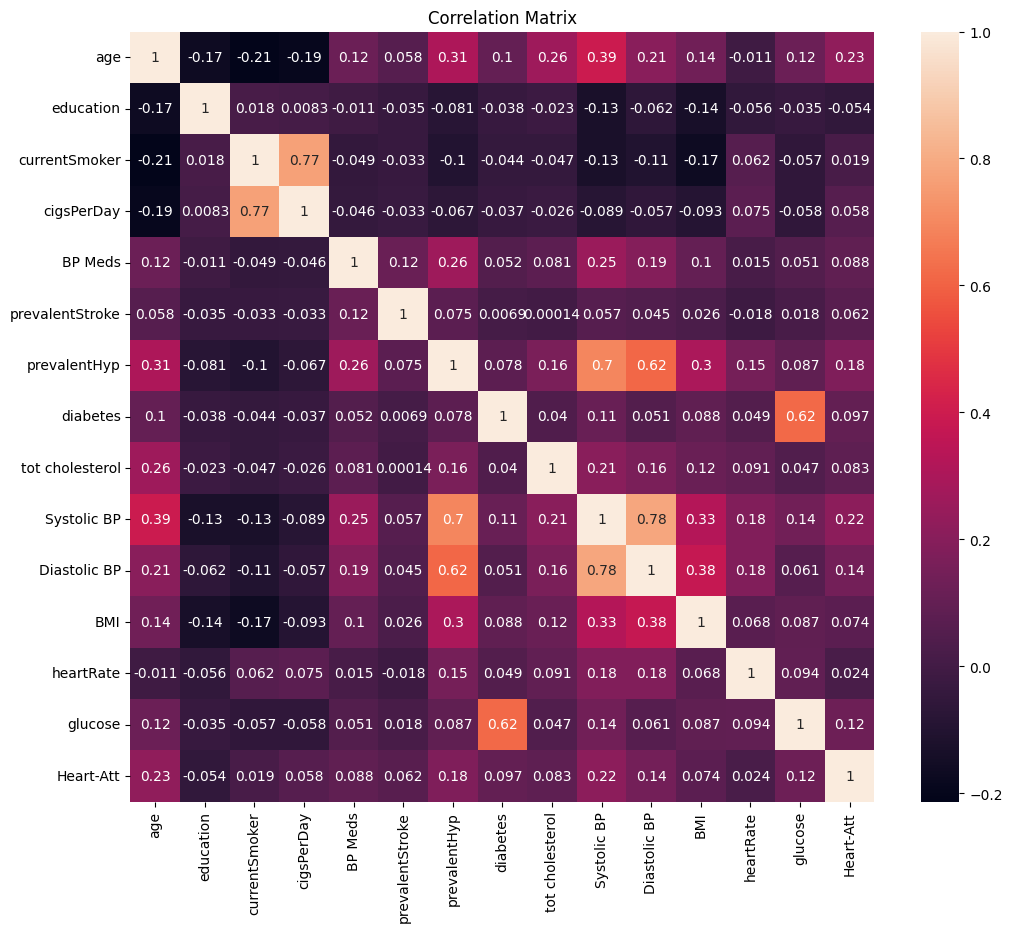

In [212]:
# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### Plot distribution of the data

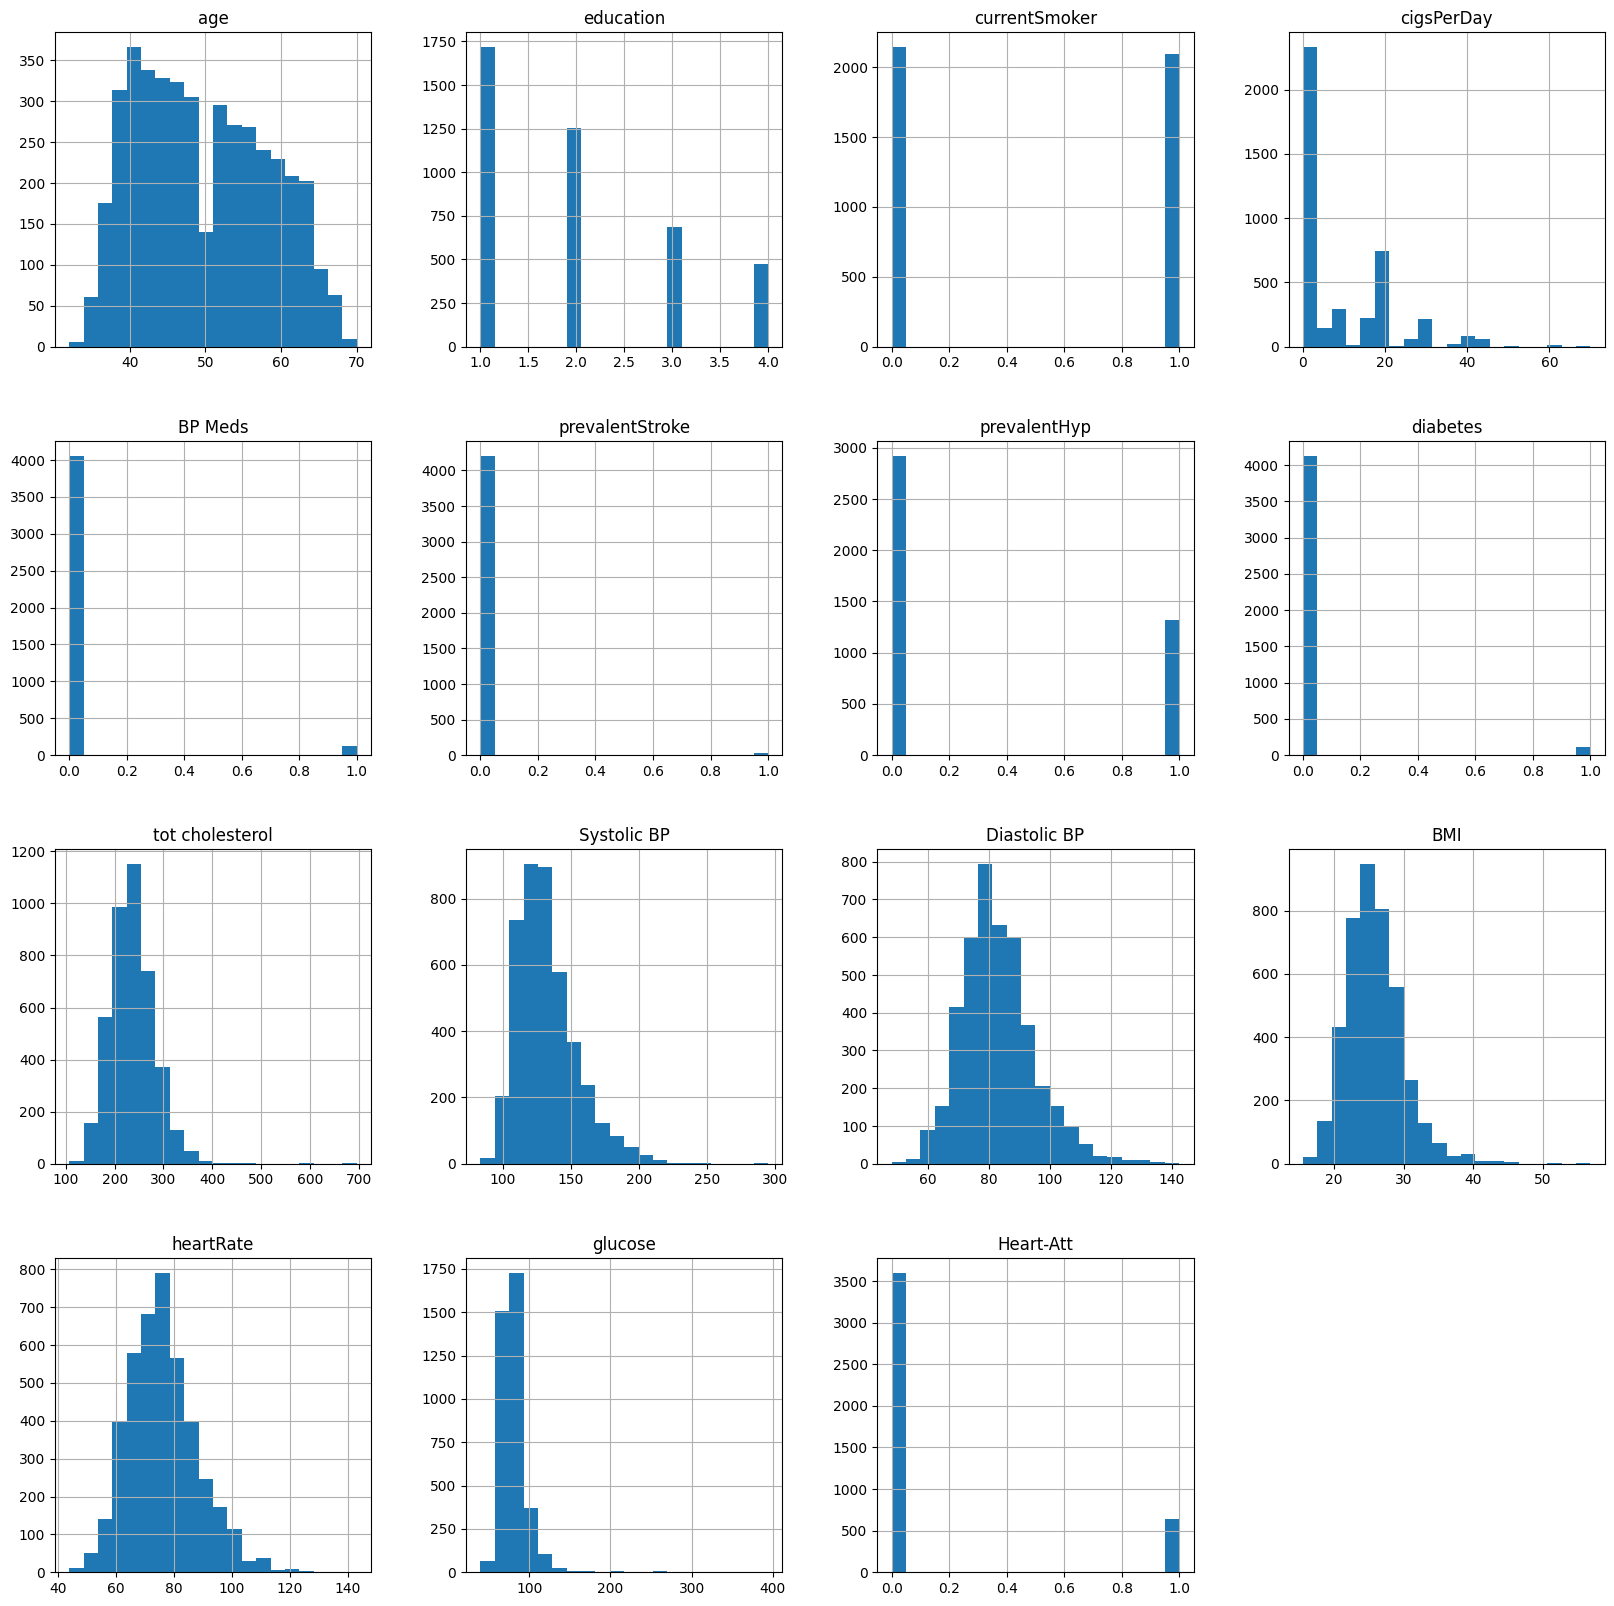

In [213]:

data.hist(figsize=(20, 20), bins=20)
plt.show()

### Identify and count the number of outliers

In [214]:
# Identify and count the number of outliers using the IQR method
# Assuming your original DataFrame is named data_before_encoding
# Step 1: Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns.drop('Heart-Att')

# Step 2: Function to count outliers using IQR method
def count_outliers(df):
    outliers = {}
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        outliers[column] = outlier_count
    return outliers

# Step 3: Calculate outliers
outliers = count_outliers(data)

# Step 4: Print or process outlier information
print("\nNumber of outliers in each numerical column before encoding:")
print(outliers)



Number of outliers in each numerical column before encoding:
{'age': 0, 'education': 0, 'currentSmoker': 0, 'cigsPerDay': 12, 'BP Meds': 124, 'prevalentStroke': 25, 'prevalentHyp': 0, 'diabetes': 109, 'tot cholesterol': 56, 'Systolic BP': 126, 'Diastolic BP': 77, 'BMI': 96, 'heartRate': 75, 'glucose': 188}


### Impute missing values

In [216]:
imputer = SimpleImputer(missing_values = np.nan, 
                        strategy ='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

### Encode categorical features

In [217]:
target_variable = data_imputed['Heart-Att']
features = data_imputed.drop(columns=['Heart-Att'])  # Drop the target variable column
# Initialize LabelEncoder

label_encoder = LabelEncoder()
# Encode categorical columns
for column in features.select_dtypes(include=['object']).columns:
    features[column] = label_encoder.fit_transform(features[column])

data_encoded = pd.concat([features, target_variable], axis=1)

# Check the result
print(data_encoded['Heart-Att'].value_counts()) 

Heart-Att
0.0    3596
1.0     644
Name: count, dtype: int64


### Outlier treatment using the IQR method

In [218]:
# Outlier treatment using the IQR method
def treat_outliers(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df
data_outliers = treat_outliers(data_encoded)
# Check again for any remaining missing values after outlier treatment
print("\nMissing values after outlier treatment:")
print(data_outliers.isnull().sum())


Missing values after outlier treatment:
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64


In [219]:
# Step 4: Confirm the column names
print("\nColumn names in the dataset:")
print(data_imputed.columns)


Column names in the dataset:
Index(['age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')


### Split the dataset

In [222]:
target_column_name = 'Heart-Att'
# Split the dataset
X = data_imputed.drop(target_column_name, axis=1)
y = data_imputed[target_column_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("TRAIN X SHAPE:",X_train.shape)
print("TRAIN Y SHAPE:",y_train.shape)
print("VALUE COUNTS:\n",y_train.value_counts())
print("TEST X SHAPE :",X_test.shape)
print("TEST Y SHAPE :",y_test.shape)

TRAIN X SHAPE: (3392, 14)
TRAIN Y SHAPE: (3392,)
VALUE COUNTS:
 Heart-Att
0.0    2871
1.0     521
Name: count, dtype: int64
TEST X SHAPE : (848, 14)
TEST Y SHAPE : (848,)


### Model preparation and evaluation

### Naive Bayes

In [223]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_train_pred_nb = nb_model.predict(X_train)
y_test_pred_nb = nb_model.predict(X_test)
f1_train_nb = f1_score(y_train, y_train_pred_nb)
f1_test_nb = f1_score(y_test, y_test_pred_nb)

### Decision Tree

In [224]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)
f1_train_dt = f1_score(y_train, y_train_pred_dt)
f1_test_dt = f1_score(y_test, y_test_pred_dt)
print(f"\nBest : {f1_train_dt}")


Best : 1.0


### Choose the best model

In [225]:
if f1_test_nb > f1_test_dt:
    best_model = 'Naive Bayes'
    best_f1_score = f1_test_nb
    best_y_test_pred = y_test_pred_nb
    best_y_train_pred = y_train_pred_nb
else:
    best_model = 'Decision Tree'
    best_f1_score = f1_test_dt
    best_y_test_pred = y_test_pred_dt
    best_y_train_pred = y_train_pred_dt

print(f"\nBest model: {best_model} with F1 score: {best_f1_score}")


Best model: Naive Bayes with F1 score: 0.2185792349726776


### Confusion matrix and classification report for the best model

In [227]:
conf_matrix = confusion_matrix(y_test, best_y_test_pred)
class_report = classification_report(y_test, best_y_test_pred)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[685  40]
 [103  20]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91       725
         1.0       0.33      0.16      0.22       123

    accuracy                           0.83       848
   macro avg       0.60      0.55      0.56       848
weighted avg       0.79      0.83      0.81       848

